In [7]:
import pandas as pd
customerData = pd.read_csv("CCC_Data.csv",index_col=0)

In [18]:
# Task 1
# Data Cleaning
customerData.isna().sum()
customerData.isnull().sum()
customerData.duplicated().sum()

Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

0

In [39]:
# Feature Engineering
customerData.drop('Customer Key',axis=1,inplace=True)

In [43]:
# Data Scaling
import sklearn.preprocessing as pp
from sklearn.compose import make_column_transformer
scaler = pp.StandardScaler()
transformer = make_column_transformer((scaler, ['Avg_Credit_Limit','Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made']))
processed_x = transformer.fit_transform(customerData)

In [49]:
# Task 2
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
score=[]
k_list=[]
inertia=[]
group=1
for k in range(2,21):
    model = KMeans(n_clusters=k)
    labels = model.fit_predict(processed_x)
    score.append(silhouette_score(processed_x,labels))
    k_list.append(k)
    inertia.append(model.inertia_)
    group=group+1

In [47]:
results=pd.DataFrame({"K":k_list,"score":score,'inertia':inertia})
results

,K,score,inertia
0,2,0.418425,2040.989816
1,3,0.515718,933.043749
2,4,0.355667,780.773690
3,5,0.271747,704.475919
4,6,0.255499,642.181210
5,7,0.248481,600.222333
6,8,0.227012,562.975634
7,9,0.219099,534.374558
8,10,0.207929,511.354532
9,11,0.205925,495.056419


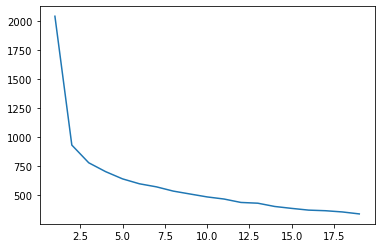

In [50]:
# Task 3
import matplotlib.pyplot as plt
plt.plot(range(1,group),inertia)

In [54]:
# Task 4
model = KMeans(n_clusters=2)
labels = model.fit_predict(processed_x)
customerData["Label"] = labels
customerData

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Label
Sl_No,,,,,,
1,100000,2,1,1,0,0
2,50000,3,0,10,9,1
3,50000,7,1,3,4,0
4,30000,5,1,1,4,0
5,100000,6,0,12,3,0
...,...,...,...,...,...,...
656,99000,10,1,10,0,0
657,84000,10,1,13,2,0
658,145000,8,1,9,1,0


In [59]:
customerData.sort_values(by='Total_visits_bank')

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Label
Sl_No,,,,,,
660,167000,9,0,12,2,0
112,12000,2,0,4,9,1
197,14000,2,0,2,8,1
201,8000,3,0,2,9,1
202,11000,1,0,3,8,1
...,...,...,...,...,...,...
446,43000,7,5,0,4,0
557,60000,4,5,0,4,0
556,52000,4,5,0,4,0
